# Práctica 4 de IA

# 2. Construcción de un clasificador en una base de datos real (3,5 puntos)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**El objetivo es predecir si un paciente tiene o no diabetes a partir de los valores de otras variables. La variable target es "class".**

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Class:** Class variable ("yes" / "no")

In [4]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
print(nombres_atrs)
X = df[nombres_atrs].values
y = df['class'].values

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Estadísticos básicos de cada atributo:**

In [5]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("yes"/"no"):**

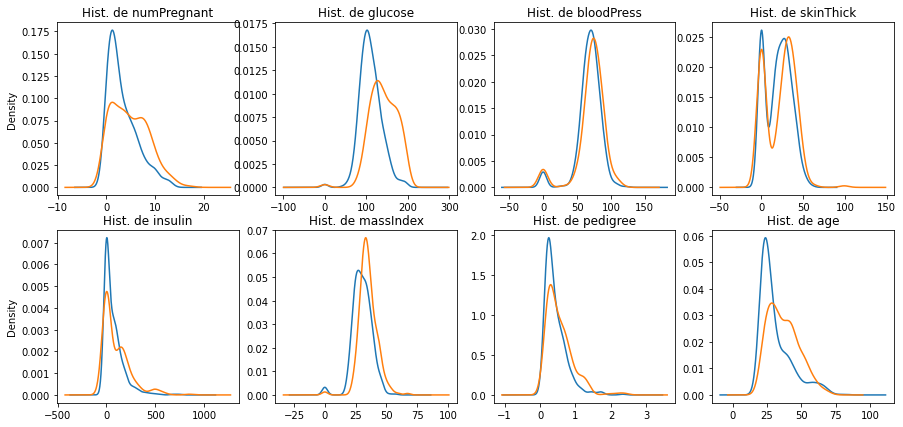

In [6]:
plt.figure(figsize=(15,7))
for i,n in enumerate(nombres_atrs):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1) # DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Todos los scores:  [0.64285714 0.62987013 0.66883117 0.75816993 0.61437908]
Score global del modelo: 0.66 +/- 0.05


In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Todos los scores:  [0.72727273 0.72077922 0.74025974 0.7124183  0.74509804]
Score global del modelo: 0.73 +/- 0.01


In [9]:
from sklearn.neural_network import MLPClassifier

nneurons=6
nlayers=3
tupla = tuple([nneurons]*nlayers)
clf = MLPClassifier(hidden_layer_sizes=tupla, max_iter=1000, alpha=0)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Todos los scores:  [0.63636364 0.71428571 0.64285714 0.69281046 0.64705882]
Score global del modelo: 0.67 +/- 0.03


## Responde aquí a las siguientes preguntas:

* ¿Cuál es el mejor score que consigues con un k-nn y con qué k (valor de n_neighbours)?
* ¿Cuál es el mejor score que consigues con un árbol de decisión y con qué profundidad máxima (valor de max_depth)?
* ¿Cuál es el mejor score que consigues con una red neuronal y con qué configuración (valor de hidden_layer_sizes)?

Nota: para responder a estas preguntas sólo hay que cambiar el tipo de modelo y sus parámetros en la celda anterior.

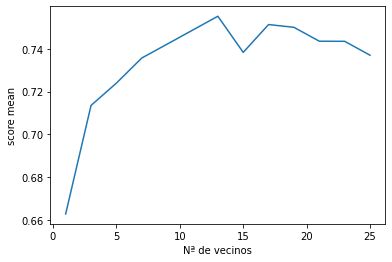

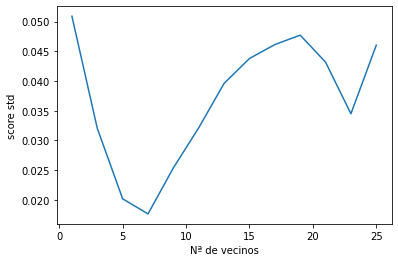

In [10]:
from sklearn.neighbors import KNeighborsClassifier
r=26
n=6

neighbors_score_mean=[]
neighbors_score_std=[]
neighbors_index=[2*i+1 for i in range(0,r//2)]
for i in range(0, r//2):
    k=2*i+1 #Sólo usamos números impares para que no haya empates
    clf = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(clf, X, y, cv=5)
    neighbors_score_mean.append(scores.mean())
    neighbors_score_std.append(scores.std())

plt.xlabel('Nª de vecinos')
plt.ylabel('score mean')
plt.plot(neighbors_index, neighbors_score_mean)
plt.show()
plt.ylabel('score std')
plt.xlabel('Nª de vecinos')
plt.plot(neighbors_index, neighbors_score_std)
plt.show()

Obsevando los resultados gráficos pensamos que el mejor resultado de los valores de k para k-vecinos próximos está en torno a 13 vecinos, pues a partir de ese valor la media de aciertos empieza a decrecer y ya con valores anteriores la varianza había comenzado a aumentar. Por eso creemos que 13 es el valor óptimo pues tiene la media de aciertos más alta y la desviación típica entre las pruebas de 13-vecinos próximos no es demasiado grande. 

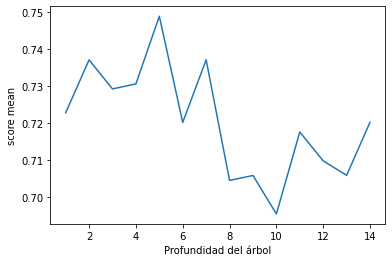

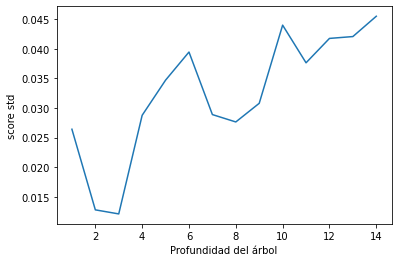

In [11]:
from sklearn.tree import DecisionTreeClassifier

r=15

tree_mean=[]
tree_std=[]
for i in range(1, r):
    clf = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, X, y, cv=5)
    tree_mean.append(scores.mean())
    tree_std.append(scores.std())
    
plt.xlabel('Profundidad del árbol')
plt.ylabel('score mean')
plt.plot(range(1,r), tree_mean)
plt.show()
plt.ylabel('score std')
plt.xlabel('Profundidad del árbol')
plt.plot(range(1,r), tree_std)
plt.show()

Obsevando los resultados gráficos pensamos que el mejor resultado de los valores de la profundidad máxima de árboles de decisión está en torno a 5, pues a partir de ese valor la media de aciertos empieza a decrecer y ya con valores anteriores la varianza había comenzado a aumentar. Por eso creemos que 5 es el valor óptimo pues tiene la media de aciertos más alta y la desviación típica entre las pruebas de árboles de decisión de profundidad máxima 5 no es demasiado grande.

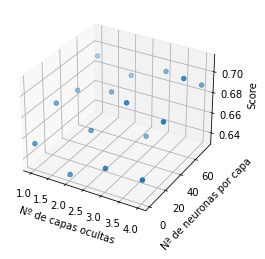

In [12]:
from sklearn.neural_network import MLPClassifier

neural_mean=[]
neural_std=[]
def score_neural(nlayers, nneurons):
    tupla = tuple([nneurons]*nlayers)
    clf = MLPClassifier(hidden_layer_sizes=tupla, max_iter=1000, alpha=0)
    scores = cross_val_score(clf, X, y, cv=5)
    return [nlayers, nneurons, scores.mean(), scores.std()]

xs=[]
ys=[]
ss=[]
ds=[]
for i in range(1, 5):
    for j in range(1, 101, 25):
        aux=score_neural(i,j)
        xs.append(aux[0])
        ys.append(aux[1])
        ss.append(aux[2])
        ds.append(aux[3])   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, ss)
ax.set_xlabel('Nº de capas ocultas')
ax.set_ylabel('Nª de neuronas por capa')
ax.set_zlabel('Score')
plt.show()
ax.scatter(xs, ys, ds)
ax.set_xlabel('Nº de capas ocultas')
ax.set_ylabel('Nª de neuronas por capa')
ax.set_zlabel('Std')
plt.show()

A la vista de los resultados vemos que aumentar el número de neuronas si mejora significativamente los resultados pero aumentando el coste computacional. Otra cosa más difícil de analizar es como afecta el número de capas ocultas al rendimiento del estimador. Para empezar el coste computacional aumenta masivamente y los resultados, lejos de mejorar como querríamos, llegan a empeorar al aumentar el número de capas. Esto se debe a que intentamos resolver un problema relativamente sencillo con una red neuronal demasiado compleja, lo que conocemos coloquialmente como "matar moscas a cañonazos".

## Mejora el modelo: procesamiento de los atributos y búsqueda de parámetros

En ocasiones, en lugar de utilizar modelos más complejos, es más útil invertir más tiempo en el procesamiento de los datos para conseguir mejores resultados.

En este apartado vas a investigar mecanismos para preparar los datos y obtener (en principio) mejores resultados: construcción y selección de atributos, preprocesamiento (detección de outliers, missing values, centrado y escalado).

Razona por qué decides probar o ignorar alguno de estos métodos, y cómo cambian los resultados al aplicarlos (puedes crear tantas celdas como consideres oportunas).

Primero hicimos una prueba sencilla de mirar cuales son los campos que aportan mayor información, y luego conseguimos mejores resultados quitando los valores con campos a 0 que no tienen sentido (no tiene sentido tener 0 de bloodpressure al igual que en otros campos) y valores atípicos.

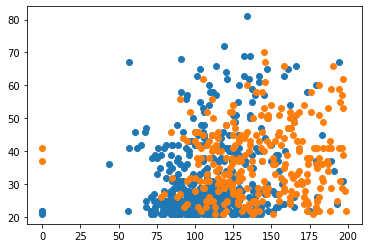

In [11]:
df = pd.read_csv("pima.csv", header=0, sep=',')

X = df['glucose'].values
y = df['age'].values
values = df['class'].values

var11=[]
var12=[]
var21=[]
var22=[]

for i,v in enumerate(values):
    if v=='no':
        var11.append(X[i])
        var12.append(y[i])
    else:
        var21.append(X[i])
        var22.append(y[i])

plt.plot(var11,var12,'o')
plt.plot(var21,var22,'o')
plt.show()

Hemos observado las gráficas de arriba y hemos visto que posiblemente los valores más significativos del banco de pruebas son la glucosa y la edad. Así pues hemos querido ver los datos representados solo respecto a estos dos parámetros y claramente vemos una tendencia a la diabetes en las personas mayores con altos índices de glucosa.

Si esto es verdad en un árbol de decisión la primera decisión dependerá únicamente de el índice de glucosa (por ser el más significativo) y salvo en algún caso en particular (en el que la segunda decisión se toma en función del número de embarazos y no de la edad) el resultado con profundidad 2 será el mismo teniendo en cuenta todos los atributos que teniendo en cuenta solo la glucosa y la edad.

In [12]:
from sklearn.tree import DecisionTreeClassifier

print("Calculamos los valores de acierto del árbol de decisión con profundidad 1")
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
X = df[nombres_atrs].values
y = df['class'].values

clf = DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

print("\nObservando las gráficas del comienzo del script hemos comprobado que los dos parámetros "+
      "más significativos son el índice de glucosa y la edad")
df = pd.read_csv("pima.csv", header=0, sep=',')
X = df[['glucose','age']].values
y = df['class'].values

clf = DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

print("\nA continuación mostramos una prueba con otros dos parámetros que obtiene "
      "peores resultados")
df = pd.read_csv("pima.csv", header=0, sep=',')
X = df[['bloodPress','age']].values
y = df['class'].values

clf = DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Calculamos los valores de acierto del árbol de decisión con profundidad 1
Todos los scores:  [0.73376623 0.71428571 0.74025974 0.75163399 0.74509804]
Score global del modelo: 0.74 +/- 0.01

Observando las gráficas del comienzo del script hemos comprobado que los dos parámetros más significativos son el índice de glucosa y la edad
Todos los scores:  [0.68181818 0.71428571 0.71428571 0.75163399 0.74509804]
Score global del modelo: 0.72 +/- 0.03

A continuación mostramos una prueba con otros dos parámetros que obtiene peores resultados
Todos los scores:  [0.65584416 0.6038961  0.64935065 0.66666667 0.65359477]
Score global del modelo: 0.65 +/- 0.02


In [124]:
import numpy as np
df = pd.read_csv("pima.csv", header=0, sep=',')

# Quitar valores con 0 en campos sin sentido que haya un 0
df2=[]
for i in range(10):
    df2.append([])
for [numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,clase] in df.values:
    if(glucose==0 or bloodPress==0 or skinThick==0 or insulin==0 or massIndex==0 or pedigree==0 or age==0):
        continue
    else:
        df2[0].append(numPregnant)
        df2[1].append(glucose)
        df2[2].append(bloodPress)
        df2[3].append(skinThick)
        df2[4].append(insulin)
        df2[5].append(massIndex)
        df2[6].append(pedigree)
        df2[7].append(age)
        df2[8].append(clase)
        df2[9].append([numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age])

indices=set()
for i in range(8):
    q3,q1 = np.percentile(df2[i],[98,2])
    
    for indice,x in enumerate(df2[i]):
        if x>q3 or x<q1:
            indices.add(indice)

indices=sorted(indices)
for i,indice in enumerate(indices):
    df2[8].pop(indice-i)
    df2[9].pop(indice-i)

In [125]:
X = df2[9]
y = df2[8]

In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1) # DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Todos los scores:  [0.64285714 0.62987013 0.66883117 0.75816993 0.61437908]
Score global del modelo: 0.66 +/- 0.05


In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Todos los scores:  [0.72727273 0.72077922 0.74025974 0.7124183  0.74509804]
Score global del modelo: 0.73 +/- 0.01


In [10]:
from sklearn.neural_network import MLPClassifier

nneurons=6
nlayers=3
tupla = tuple([nneurons]*nlayers)
clf = MLPClassifier(hidden_layer_sizes=tupla, max_iter=1000, alpha=0)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Todos los scores:  [0.64935065 0.72077922 0.7012987  0.64052288 0.52941176]
Score global del modelo: 0.65 +/- 0.07


¿Opinas que otra configuración de los hiper-parámetros de los clasificadores utilizados puede resolver el problema más eficientemente? 
Es lo más probable. 

Prueba ahora a cambiar el valor de los hiper-parámetros y a devolver como clasificador final el que minimize la estimación del error de generalización. Para ello hay que hacer dos cosas. La primera, cambiar el modo en el que estimamos el error de generalización. Si basamos nuestro resultado en el error proporcionado por el test, haremos overfitting en el conjunto de test. Por ello debemos cambiar esta estimación. Estimaremos el error de generalización de cada clasificador usando Nested Cross Validation. 
Por otro lado, haremos una búsqueda en rejilla de los hiper-parámetros óptimos. Devolveremos el valor de los hiper-parámetros que optimize esa estimación del error. 

Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html a este problema y al espacio de hiper-parámetros de uno de los clasificadores. 
Recuerda que en https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier y en https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier tienes información sobre cada uno de los hiper-parámetros. Eres libre de elegir los valores y los hiper-parámetros que consideres. Antes de configurar la rejilla, lee un poco sobre cada uno de los hiper-parámetros para asegurarte que tiene sentido tu búsqueda.

In [6]:
svm = DecisionTreeClassifier(max_depth=3)
svm.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

Tras ver los hiperparámetros de DecisionTree, analizarlos e informarnos en internet hemos llegado a la conclusión de que los hiperparámetros más importantes son en primer lugar "criterion" y "max_depth". Por eso probamos primero a variar estos valores para obtener los mejores resultados.

(Más adelante probamos a variar más hiperparámetros y analizamos los resultados.)

{'criterion': 'entropy', 'max_depth': 5}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'gini', 'max_depth': 5}
{'criterion': 'gini', 'max_depth': 3}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'gini', 'max_depth': 5}
{'criterion': 'gini', 'max_depth': 5}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'gini', 'max_depth': 3}
{'criterion': 'entropy', 'max_depth': 3}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 3}
{'criterion': 'entropy', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 2}
{'criterion': 'gini', 'max_depth': 5}
{'criterion': 'gini', 'max_depth': 5}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 3}
{'criterion': 'entropy', 'max_depth': 3}
{'criterion': 'gini', 'max_depth': 5}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'gini', 'max_depth': 5}
{'criterion': 'entropy', 'max_depth': 3}
{'criterion': 'gini', '

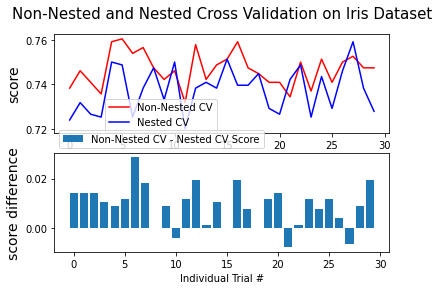

In [43]:
# incluye aquí código sobre este apartado
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
df = pd.read_csv("pima.csv", header=0, sep=',')
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
X = df[nombres_atrs].values
y = df['class'].values

# Set up possible values of parameters to optimize over
p_grid = {"criterion": ('gini', 'entropy'), "max_depth": [2,3,5,7,10,15]}
    #"splitter": ("best","random"), "min_samples_split": [2,3,5,10]
    #"min_samples_leaf": [1,2,5,10], "max_leaf_nodes": [5, 10, 15, 20],
    #"max_features": ("auto", "sqrt", "log2"), "min_impurity_decrease": [0,0.01,0.05,0.1,0.2],
    #"ccp_alpha": [0,0.01,0.05,0.1,0.2]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = DecisionTreeClassifier(max_depth=3)

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    print(clf.best_params_)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, return_train_score=True)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

Vemos que los resultados son mejores, aunque aproximadamente sólo por un 1% de aciertos.
En cuanto a los hiperparámetros más óptimos tras esta ejecución queda claro, algo ya hablado en clase de teoría, demasiada profundidad no es bueno pues provoca overfitting. A pesar de que más profundidad permite hacer más preguntas y especializar más el árbol de decisión, los valores más altos que hemos metido (7, 10 y 15) no han dado ni úna sola vez mejores resultados que valores más moderados como 2, 3 y 5.

El caso del criterio es más difuso pues tenemos 11 casos donde el criterio de entropía ha sido mejor y 19 en el que ha sido mejor el criterio gini, haciendo que no sea tan claro que gini sea mejor que entropía.

A continuación probamos a variar más hiperparámetros que pensamos que pueden ser interesantes y mejorar más el rendimiento.

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_impurity_decrease': 0.01, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_impurity_decrease': 0, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 5

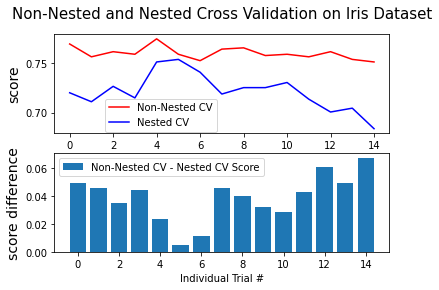

In [46]:
# incluye aquí código sobre este apartado
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 15

# Load the dataset
df = pd.read_csv("pima.csv", header=0, sep=',')
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
X = df[nombres_atrs].values
y = df['class'].values

# Set up possible values of parameters to optimize over
p_grid = {"criterion": ('gini', 'entropy'), "splitter": ("best","random"),
    "max_features": ("auto", "sqrt", "log2"), "min_impurity_decrease": [0,0.01,0.05],
    "max_depth": [3,5,7,10], "min_samples_split": [2,3,5],
    "min_samples_leaf": [1,2,5]}# "max_leaf_nodes": [5, 10, 15, 20],
    #"max_features": ("auto", "sqrt", "log2"), "min_impurity_decrease": [0,0.01,0.05,0.1,0.2],
    #"ccp_alpha": [0,0.01,0.05,0.1,0.2]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = DecisionTreeClassifier(max_depth=3)

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    print(clf.best_params_)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, return_train_score=True)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

Esta vez la mejora es más notable, alrededor del 4% más de aciertos. Gini sigue superando en número a entropía al igual que antes y la profundidad máxima sigue siendo mejor tomando valores no demasiado grandes.

El modo de partir los nodos siempre usa best en vez de random (algo bastante predecible), el número mínimo de ejemplos para hacer particiones se sitúa en torno a 3 un valor bastante cercano al 2 que toma por defecto por lo que la ganancia con este hiperparámetro no es mucha. El número mínimo de ejemplos que debe dejar en las hojas varía entre 2 y 5 evitando así overfitting al hacer particiones sin sentido dejando hojas con un único elemento y max_features siempre toma el valor log2, es decir el valor que toma el menor número de características (pues log2(n)<sqrt(n)<n para valores de n'>'1) y por lo tanto evita el overfittimg.

In [11]:
svm = KNeighborsClassifier(n_neighbors=1)
svm.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

Tras ver los hiperparámetros de K-Vecinos Próximos, analizarlos e informarnos en internet hemos llegado a la conclusión de que el hiperparámetro más importante es en primer lugar "n_neighbors". Por eso probamos primero a variar este parámetro para obtener los mejores resultados.

(Más adelante probamos a variar más hiperparámetros y analizamos los resultados.)

{'n_neighbors': 10}
{'n_neighbors': 20}
{'n_neighbors': 10}
{'n_neighbors': 15}
{'n_neighbors': 20}
{'n_neighbors': 10}
{'n_neighbors': 10}
{'n_neighbors': 15}
{'n_neighbors': 30}
{'n_neighbors': 10}
{'n_neighbors': 20}
{'n_neighbors': 15}
{'n_neighbors': 20}
{'n_neighbors': 15}
{'n_neighbors': 10}
{'n_neighbors': 15}
{'n_neighbors': 15}
{'n_neighbors': 15}
{'n_neighbors': 15}
{'n_neighbors': 15}
{'n_neighbors': 10}
{'n_neighbors': 20}
{'n_neighbors': 20}
{'n_neighbors': 30}
{'n_neighbors': 15}
{'n_neighbors': 10}
{'n_neighbors': 15}
{'n_neighbors': 10}
{'n_neighbors': 15}
{'n_neighbors': 15}
Average difference of 0.008898 with std. dev. of 0.007740.


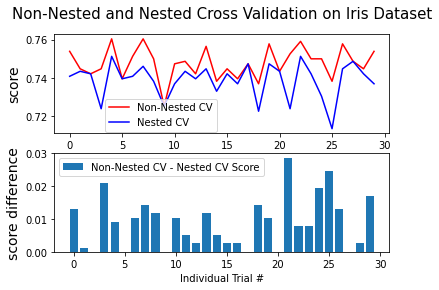

In [49]:
# incluye aquí código sobre este apartado
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
df = pd.read_csv("pima.csv", header=0, sep=',')
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
X = df[nombres_atrs].values
y = df['class'].values

# Set up possible values of parameters to optimize over
p_grid = {"n_neighbors": [1,5,10,15,20,30,40]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = KNeighborsClassifier(n_neighbors=1)

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    print(clf.best_params_)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, return_train_score=True)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

Al igual que antes no se toman valores demasiado altos del número de vecinos a tener en cuenta pues provocaría overfitting, aún así se toman valores relativamente altos del número de vecinos a observar pues valores demasiado bajos provocan underfitting. La mejora es de alrededor del 0,9% y al igual que antes vamos a probar a optimizar más hiperparámetros para aumentar la tasa de aciertos.

{'algorithm': 'auto', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'n_neighbors': 40, 'p': 1, 'weights': 'distance'}
{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
{'algorithm': 'auto', 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
{'algorithm': 'auto', 'n_neighbors': 40, 'p': 1, 'weights': 'distance'}
{'algorithm': 'auto', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
{'algorithm': 'auto', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
{'algorithm': 'auto', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
{'algorithm': 'auto', 'n_neighbors': 40, 'p': 1, 'weights': 'distance'

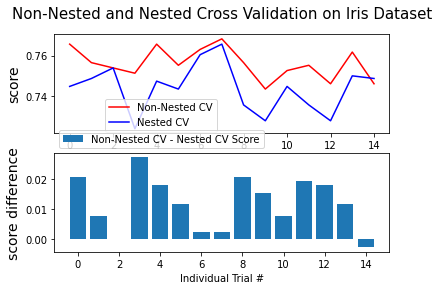

In [51]:
# incluye aquí código sobre este apartado
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 15

# Load the dataset
df = pd.read_csv("pima.csv", header=0, sep=',')
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
X = df[nombres_atrs].values
y = df['class'].values

# Set up possible values of parameters to optimize over
p_grid = {"n_neighbors": [1,5,10,15,20,30,40], "p": [1,2],
    "weights": ('uniform', 'distance'), "algorithm": ('auto', 'ball_tree', 'kd_tree', 'brute')}

# We will use a Support Vector Classifier with "rbf" kernel
svm = KNeighborsClassifier(n_neighbors=1)

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    print(clf.best_params_)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, return_train_score=True)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()

Obviamente el algoritmo mejor es siempre Auto pues es el que escoge un algoritmo específico para lo datos del test. Es destacable que el número de vecinos toma ahora valores relativamente altos y específicamente más altos que en la prueba anterior. En cuanto al valor de 'p' que afecta a la distancia a usar siempre se toma el valor 1 que implica usar la distancia Manhattan, en cuanto a los pesos de predicción no podemos afirmar nada con seguridad pues toma prácricamente los mismos valores de pesos uniformes o inversamente proporcionales a la distancia.